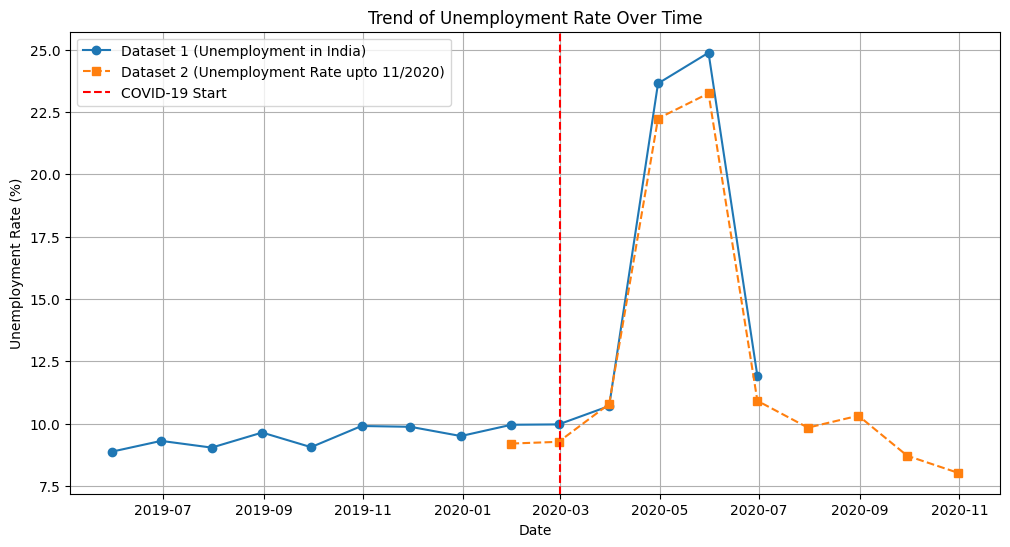

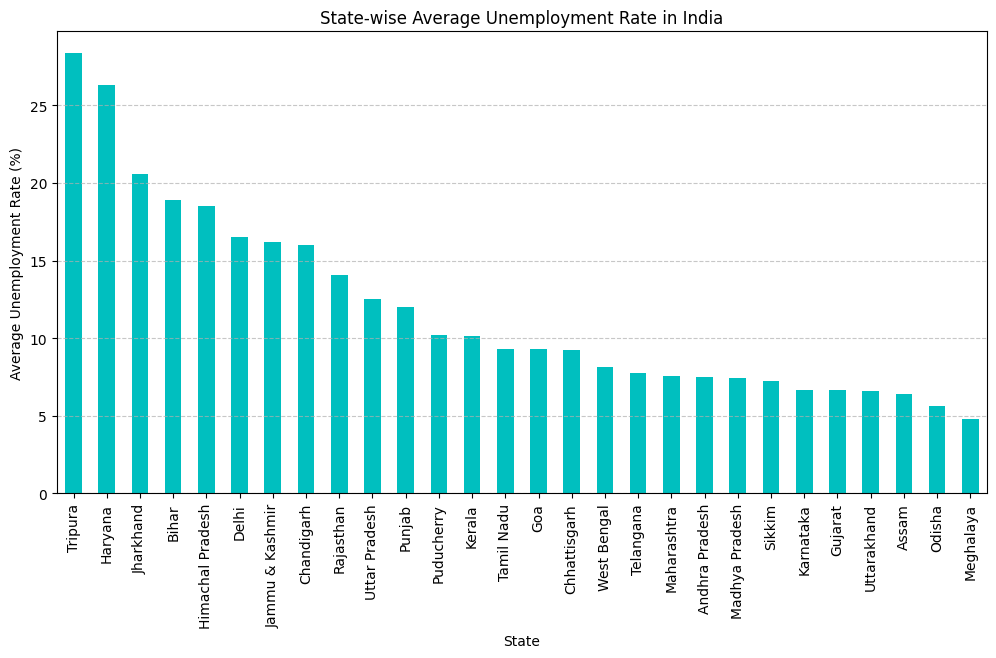

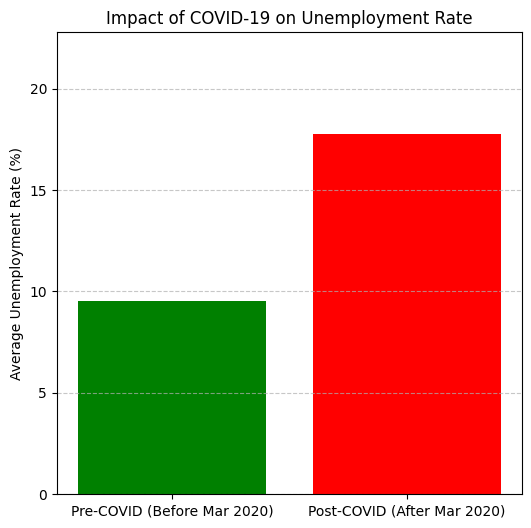

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
file1_path = "/mnt/data/Unemployment in India.xlsx"
file2_path = "/mnt/data/Unemployment_Rate_upto_11_2020.xlsx"

# Load Excel files
xls1 = pd.ExcelFile("Unemployment in India.xlsx")
xls2 = pd.ExcelFile("Unemployment_Rate_upto_11_2020.xlsx")

# Load data

df1 = xls1.parse("Unemployment in India")
df2 = xls2.parse("Unemployment_Rate_upto_11_2020")

# Standardizing column names
df1.columns = ['Region', 'Date', 'Frequency', 'Unemployment Rate (%)', 'Employed', 'Labour Participation Rate (%)', 'Area']
df2.columns = ['Region', 'Date', 'Frequency', 'Unemployment Rate (%)', 'Employed', 'Labour Participation Rate (%)', 'Region Group', 'Longitude', 'Latitude']

# Convert 'Date' to datetime
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True, errors='coerce')

# Drop missing values
df1_cleaned = df1.dropna().reset_index(drop=True)

# Unemployment trend analysis
df1_trend = df1_cleaned.groupby('Date')['Unemployment Rate (%)'].mean()
df2_trend = df2.groupby('Date')['Unemployment Rate (%)'].mean()

plt.figure(figsize=(12, 6))
plt.plot(df1_trend, marker='o', linestyle='-', label="Dataset 1 (Unemployment in India)")
plt.plot(df2_trend, marker='s', linestyle='--', label="Dataset 2 (Unemployment Rate upto 11/2020)")
plt.axvline(pd.to_datetime("2020-03-01"), color='r', linestyle='--', label="COVID-19 Start")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Trend of Unemployment Rate Over Time")
plt.legend()
plt.grid(True)
plt.show()

# State-wise unemployment rate
statewise_unemployment = df1_cleaned.groupby('Region')['Unemployment Rate (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
statewise_unemployment.plot(kind='bar', color='c')
plt.xlabel("State")
plt.ylabel("Average Unemployment Rate (%)")
plt.title("State-wise Average Unemployment Rate in India")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# COVID-19 impact on unemployment
pre_covid = df1_cleaned[df1_cleaned['Date'] < "2020-03-01"]
post_covid = df1_cleaned[df1_cleaned['Date'] >= "2020-03-01"]

pre_covid_avg = pre_covid['Unemployment Rate (%)'].mean()
post_covid_avg = post_covid['Unemployment Rate (%)'].mean()

plt.figure(figsize=(6, 6))
plt.bar(["Pre-COVID (Before Mar 2020)", "Post-COVID (After Mar 2020)"], [pre_covid_avg, post_covid_avg], color=['g', 'r'])
plt.ylabel("Average Unemployment Rate (%)")
plt.title("Impact of COVID-19 on Unemployment Rate")
plt.ylim(0, max(pre_covid_avg, post_covid_avg) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
